Found 59 files belonging to 2 classes.
Using 48 files for training.
Found 59 files belonging to 2 classes.
Using 11 files for validation.


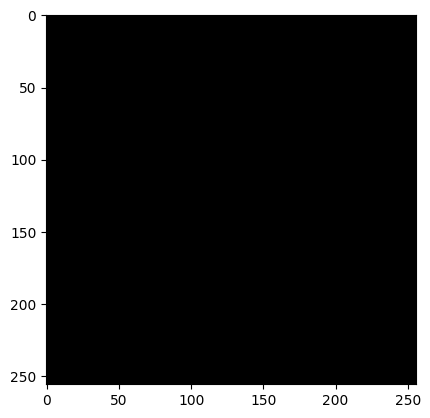

Shape of X_train:  (48, 256, 256, 3)
Shape of Y_train:  (48,)
Shape of X_test:  (11, 256, 256, 3)
Shape of Y_test:  (11,)


2025-03-11 19:58:03.896987: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


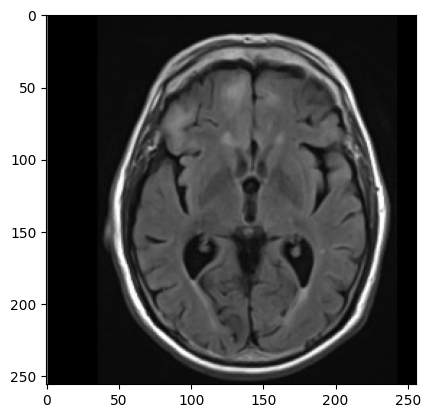

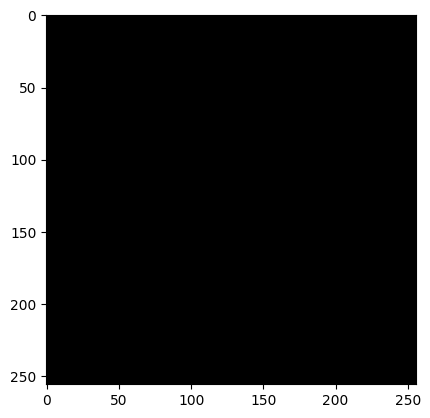

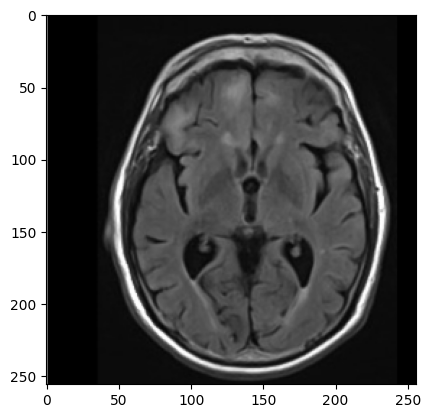

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step - accuracy: 0.5000 - loss: 0.6975
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.5000 - loss: 3.0454
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5208 - loss: 0.7551
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5208 - loss: 0.9085
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.6458 - loss: 0.5578
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5455 - loss: 0.7909


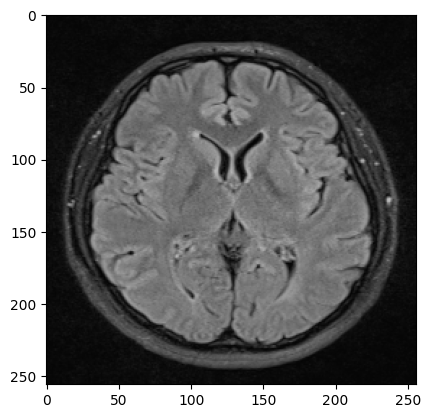

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Our model says it is a: Alzheimers


In [3]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

# Define the path to your dataset
dataset_path = "/Users/EllenaLink/Desktop/train"  

# Load the training and validation datasets
X_train = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # Use 20% of the data for validation
    subset="training",
    seed=123, 
    image_size=(256, 256),  
    batch_size=32  
)

X_test = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  
    subset="validation",
    seed=123,  
    image_size=(256, 256),  
    batch_size=32  
)

# Normalize pixel values to the range [0, 1]
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

X_train = X_train.map(normalize)
X_test = X_test.map(normalize)


model = Sequential([
    Input(shape=(100, 100, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(None, None, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# all models use the same input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Normalize the datasets
X_train = X_train.map(lambda x, y: (tf.image.resize(x, [256, 256]), y))
X_test = X_test.map(lambda x, y: (tf.image.resize(x, [256, 256]), y))

#displaying the image before converting
for x, y in X_train.take(1):
    single_image = x[0].numpy().astype('uint8')  # Take the first image in the batch
    plt.imshow(single_image)
    plt.show()


# Convert the datasets to NumPy arrays
X_train_array = np.concatenate([x.numpy() for x, y in X_train], axis=0)
Y_train_array = np.concatenate([y.numpy() for x, y in X_train], axis=0)

X_test_array = np.concatenate([x.numpy() for x, y in X_test], axis=0)
Y_test_array = np.concatenate([y.numpy() for x, y in X_test], axis=0)

# Print the shapes of the datasets
print("Shape of X_train: ", X_train_array.shape)
print("Shape of Y_train: ", Y_train_array.shape)
print("Shape of X_test: ", X_test_array.shape)
print("Shape of Y_test: ", Y_test_array.shape)

# Display a random image from the training dataset
idx = random.randint(0, len(X_train_array) - 1)
plt.imshow(X_train_array[idx])
plt.show()

# Display an unnormalized image
for x, y in X_train.take(1):  # Access the first batch
    plt.imshow(x[0].numpy().astype("uint8"))
    plt.show()
    
# display image, convert to uint8
plt.imshow((X_train_array[idx] * 255).astype("uint8"))
plt.show()

# Build the model
model = Sequential([
    Input(shape=(256, 256, 3)),  # Match your image dimensions
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_array, Y_train_array, epochs=5, batch_size=64)

# Evaluate the model on the test set
model.evaluate(X_test_array, Y_test_array)

# Make predictions
idx2 = random.randint(0, len(Y_test_array) - 1)
plt.imshow(X_test_array[idx2])
plt.show()

y_pred = model.predict(X_test_array[idx2].reshape(1, 256, 256, 3))
y_pred = y_pred > 0.5

if y_pred == 0:
    pred = 'Healthy'
else:
    pred = 'Alzheimers'

print("Our model says it is a:", pred)
